# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [250]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
  

In [192]:
df=pd.read_csv(r'C:\Users\anand\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [193]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [7]:
df.sample(8)

Age Attrition     BusinessTravel  DailyRate              Department  \
1412   30        No      Travel_Rarely        911  Research & Development   
1049   30        No      Travel_Rarely       1358                   Sales   
769    26        No  Travel_Frequently        921  Research & Development   
1060   24       Yes  Travel_Frequently        381  Research & Development   
695    37       Yes      Travel_Rarely        625                   Sales   
363    33       Yes      Travel_Rarely        350                   Sales   
518    38        No      Travel_Rarely        243                   Sales   
234    33       Yes      Travel_Rarely        813  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1412                 1          2        Medical              1   
1049                16          1  Life Sciences              1   
769                  1          1        Medical              1   
1060                 9          3        Medical              1   
695                  1          4  Life Sciences              1   
363                  5          3      Marketing              1   
518                  7          4      Marketing              1   
234                 14          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1412            1989  ...                         3            80   
1049            1479  ...                         3            80   
769             1068  ...                         3            80   
1060            1494  ...                         3            80   
695              970  ...                         3            80   
363              485  ...                         2            80   
518              709  ...                         1            80   
234              325  ...                         3            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1412                 0                 12                      6   
1049                 2                  4                      2   
769                  2                  5                      5   
1060                 0                  4                      2   
695                  0                 17                      2   
363                  0                  1                      2   
518                  0                  8                      2   
234                  1                  8                      2   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1412               2              12                  8   
1049               2               2                  1   
769                3               5                  3   
1060               2               0                  0   
695                1              14                  1   
363                3               1                  0   
518                3               7                  7   
234                1               5                  4   

      YearsSinceLastPromotion  YearsWithCurrManager  
1412                        1                     7  
1049                        2                     2  
769                         1                     3  
1060                        0                     0  
695                        11                     7  
363                         0                     0  
518                         0                     5  
234                         0                     4  

[8 rows x 35 columns]

In [8]:
type(df)

pandas.core.frame.DataFrame

In [194]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Null values

In [10]:
df.isnull()

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2                False      False           False          False   
3                False      False           False          False   
4                False      False           False          False   
...                ...        ...             ...            ...   
1465             False      False           False          False   
1466             False      False           False          False   
1467             False      False           False          False   
1468             False      False           False          False   
1469             False      False           False          False   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0              False  ...                     False          False   
1              False  ...                     False          False   
2              False  ...                     False          False   
3              False  ...                     False          False   
4              False  ...                     False          False   
...              ...  ...                       ...            ...   
1465           False  ...                     False          False   
1466           False  ...                     False          False   
1467           False  ...                     False          False   
1468           False  ...                     False          False   
1469           False  ...                     False          False   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                False              False                  False   
1                False              False                  False   
2                False              False                  False   
3                False              False                  False   
4                False              False                  False   
...                ...                ...                    ...   
1465             False              False                  False   
1466             False              False                  False   
1467             False              False                  False   
1468             False              False                  False   
1469             False              False                  False   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0               False           False               False   
1               False           False               False   
2               False           False               False   
3               False           False               False   
4               False           False               False   
...               ...             ...                 ...   
1465            False           False               False   
1466            False           False               False   
1467            False           False               False   
1468            False           False               False   
1469            False           False               False   

      YearsSinceLas

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
df.isnull().values.any()

False

<AxesSubplot:>

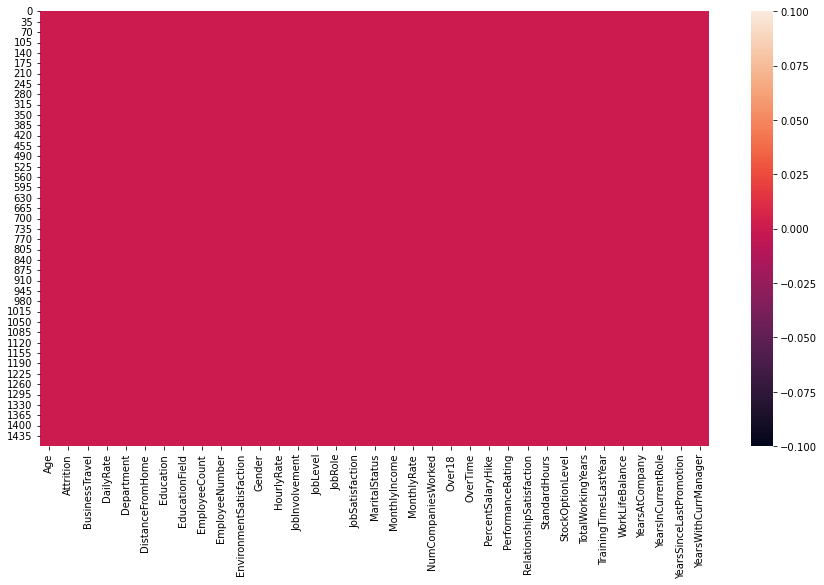

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

###### there are no missing values in the dataset

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [159]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

# Data visualization
and label encoding

In [12]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='Count'>

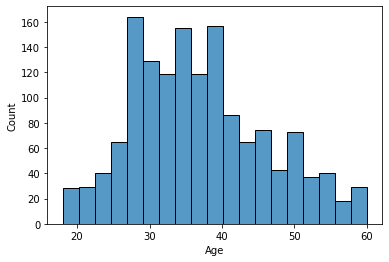

In [13]:
sns.histplot(df['Age'])

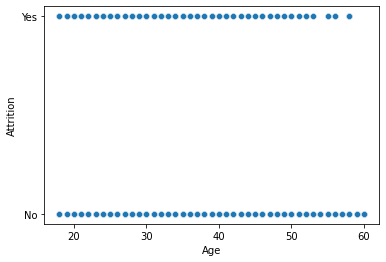

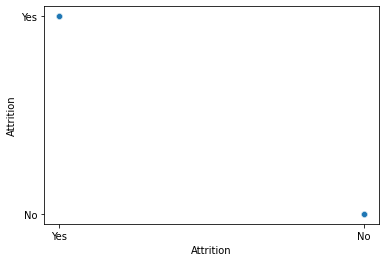

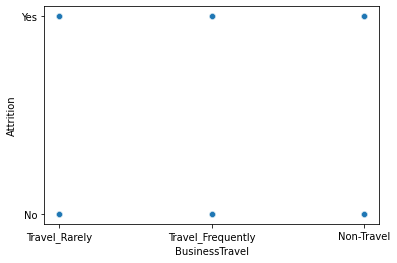

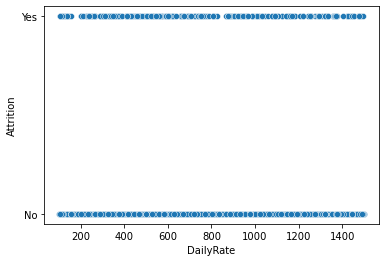

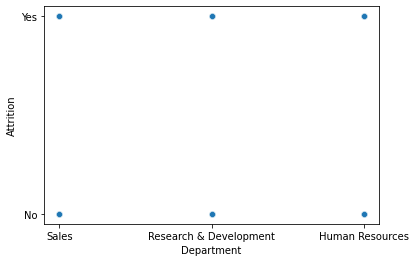

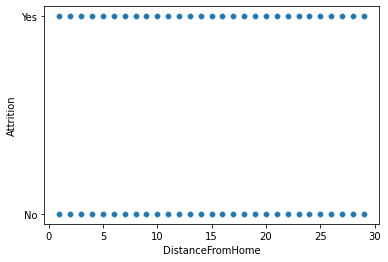

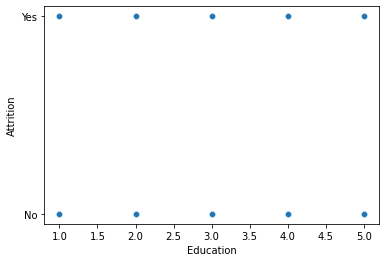

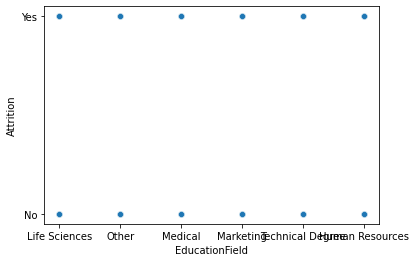

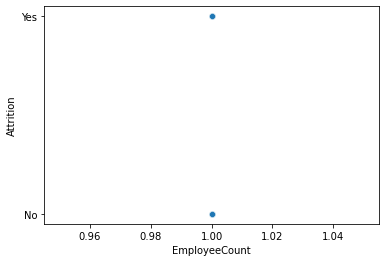

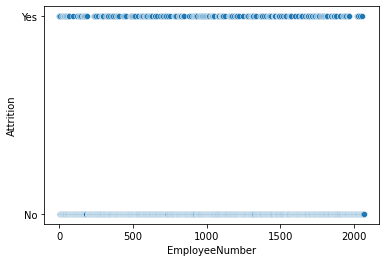

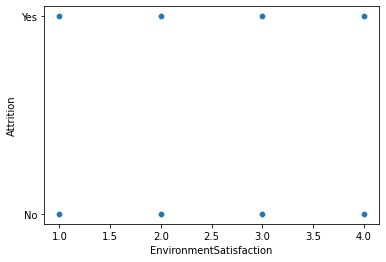

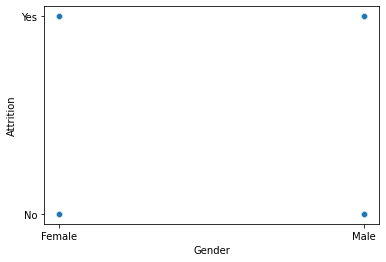

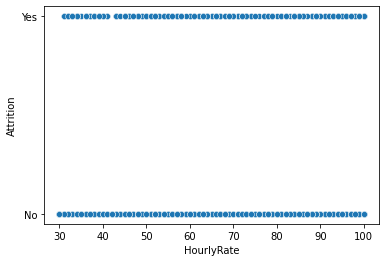

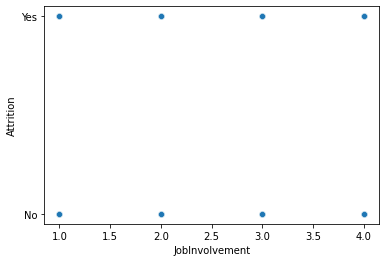

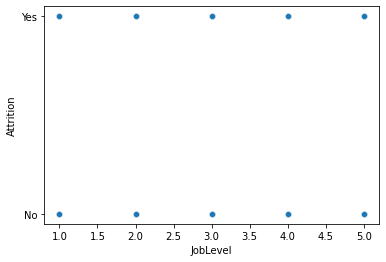

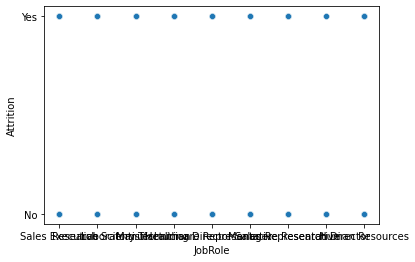

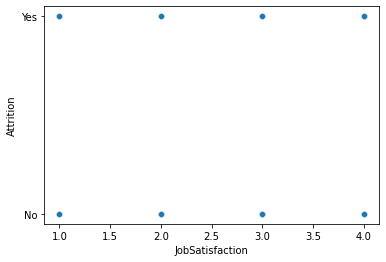

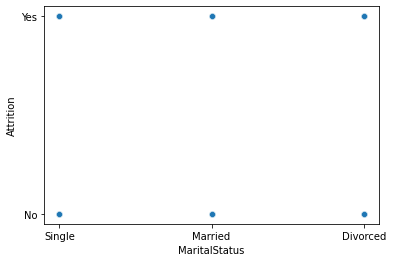

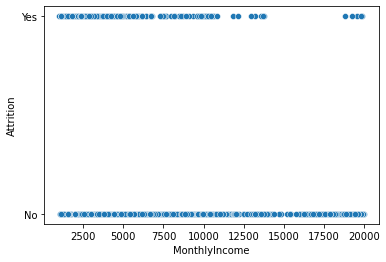

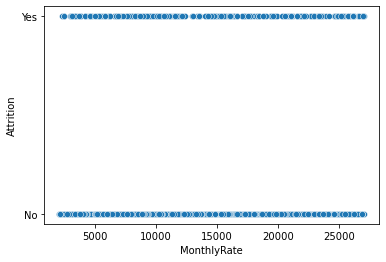

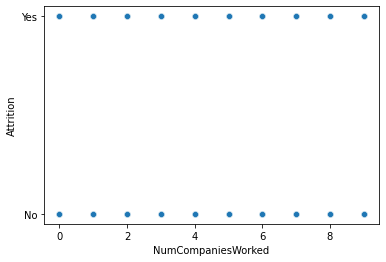

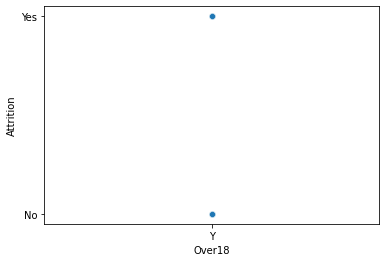

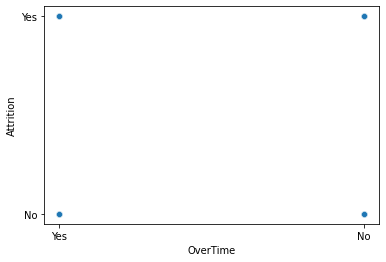

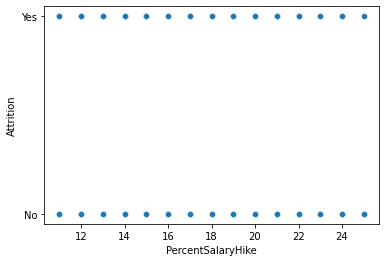

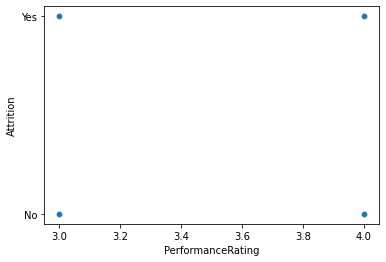

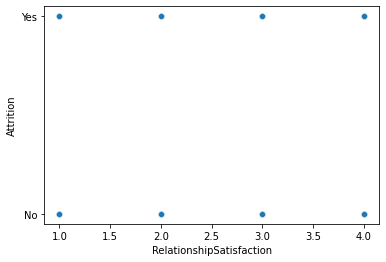

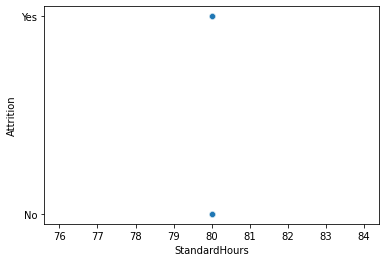

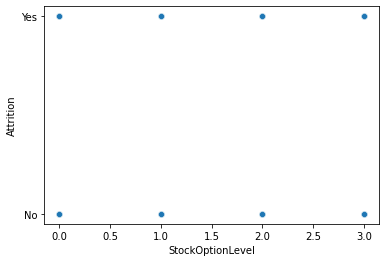

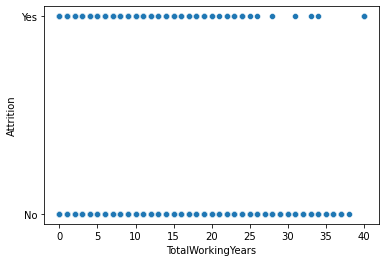

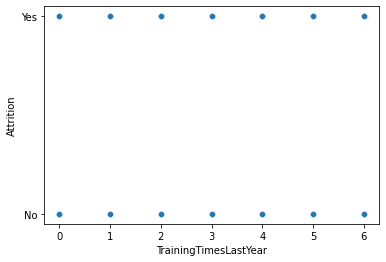

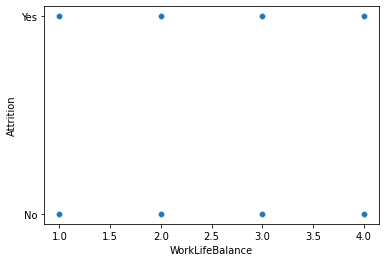

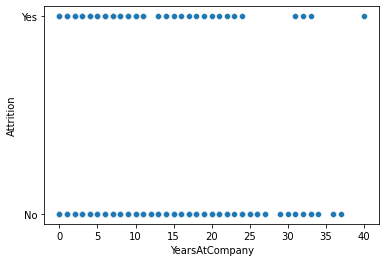

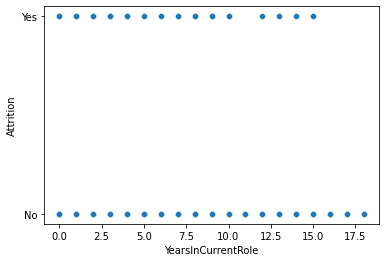

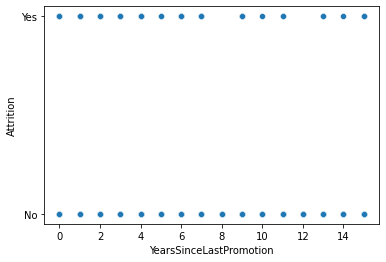

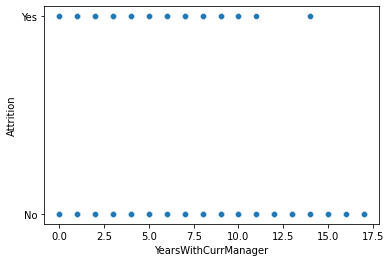

In [17]:
###Correlations of each feature with "Attrition". 
# In general, scatterplots are best for analyzing two continuous variables. Suitable in our case

for i in df.columns[0:]:
    plt.figure()
    sns.scatterplot( x= df[i], y= "Attrition", data= df)

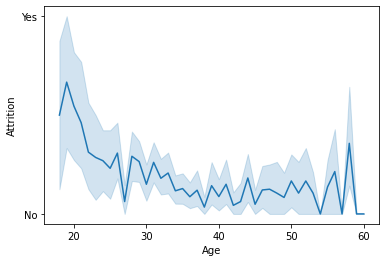

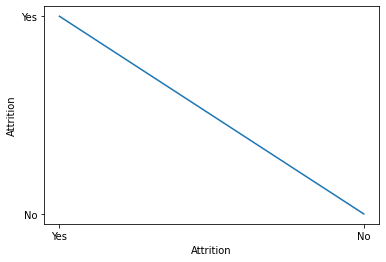

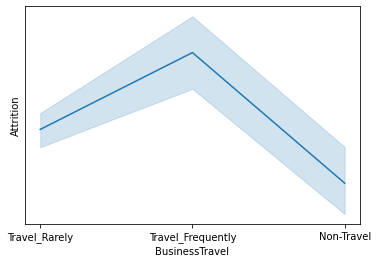

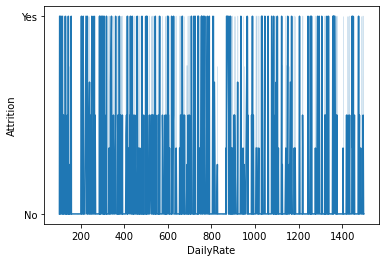

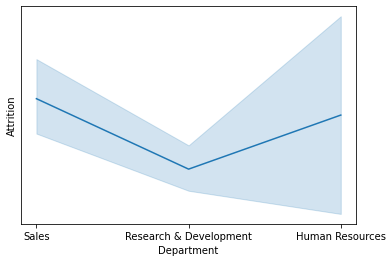

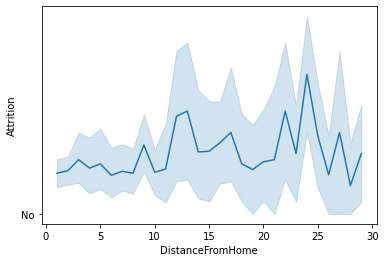

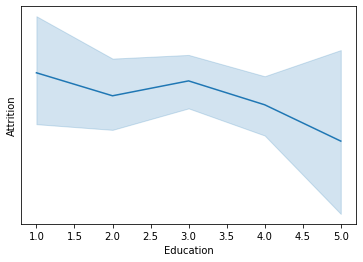

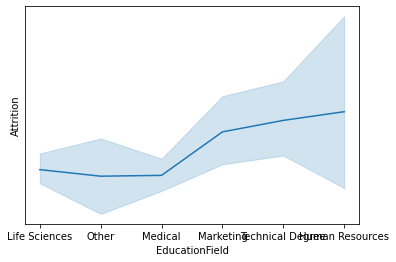

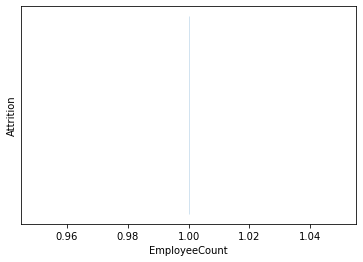

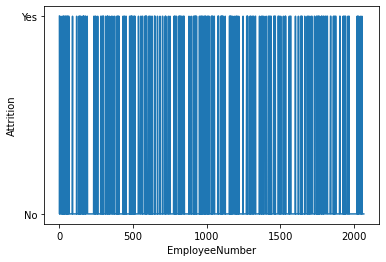

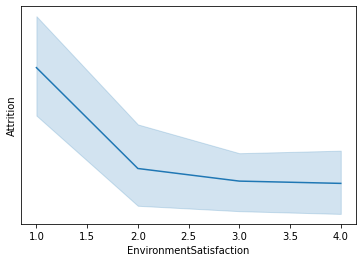

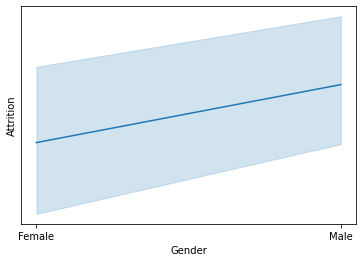

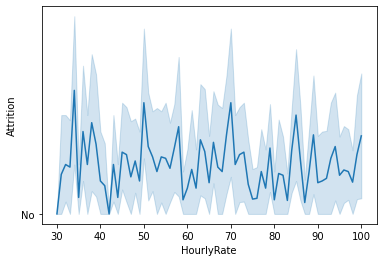

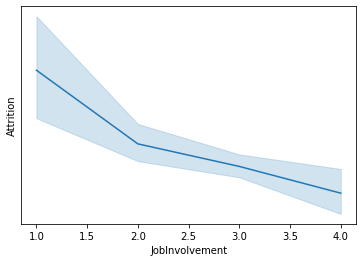

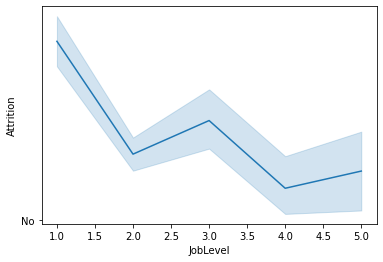

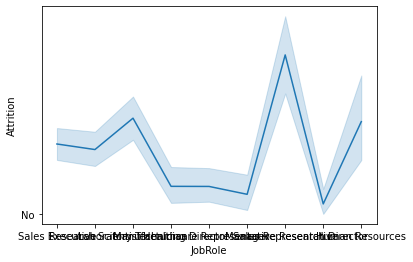

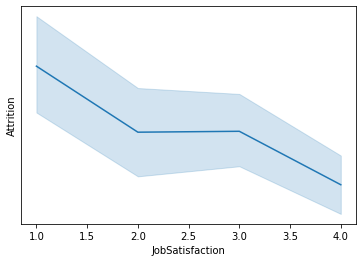

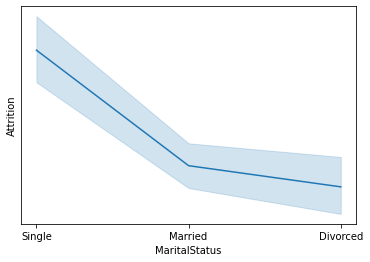

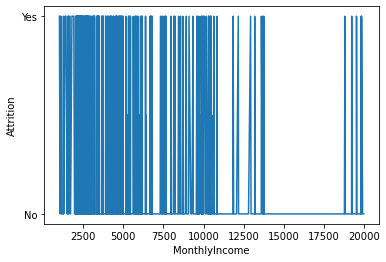

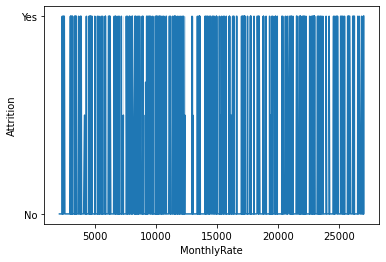

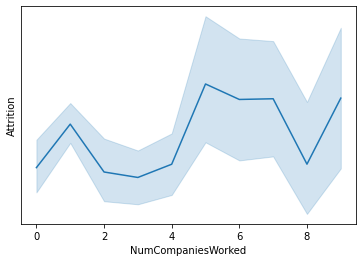

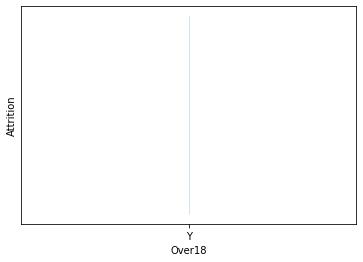

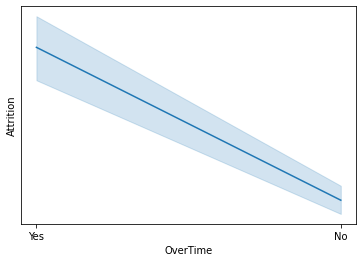

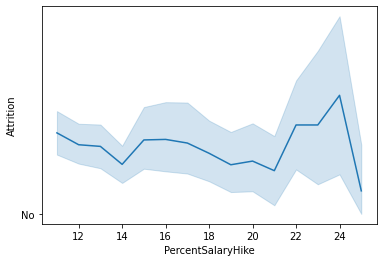

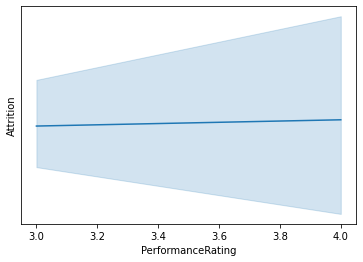

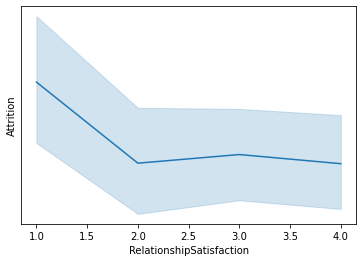

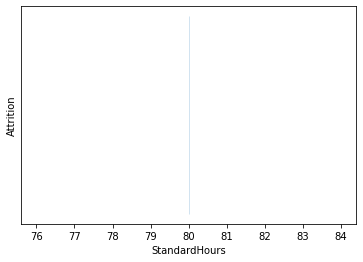

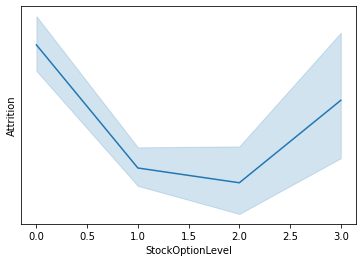

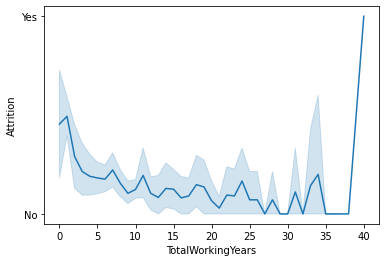

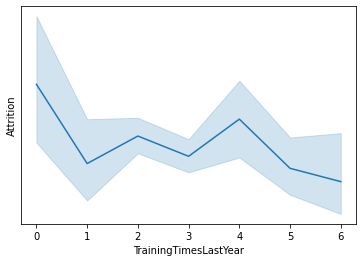

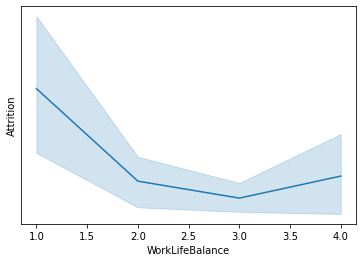

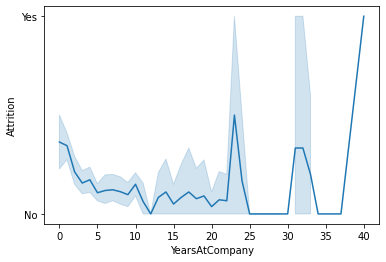

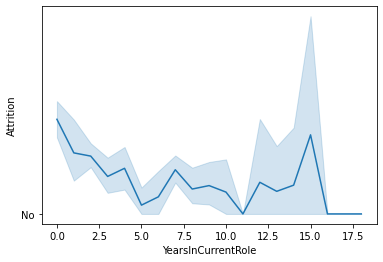

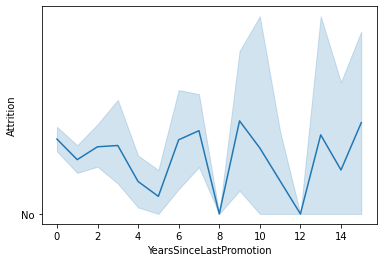

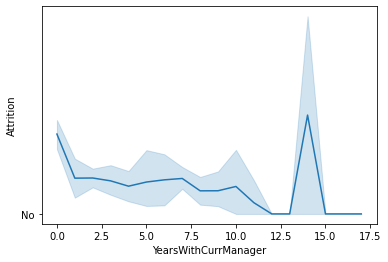

In [19]:
for i in df.columns[0:]:
    plt.figure()
    sns.lineplot(x=df[i],y='Attrition',data=df)

In [196]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x27024e54610>,
 [Text(-1.0930587195656423, 0.6064013815794939, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.6558352317393852, 0.3638408289476963, '83.88%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.12%')])

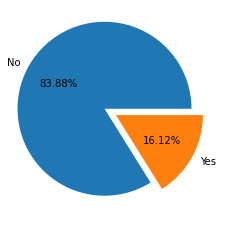

In [21]:
plt.pie(df['Attrition'].value_counts().values,labels=df['Attrition'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

In [197]:
df.groupby('BusinessTravel')['Attrition'].value_counts()

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x27024799b80>,
 [Text(-0.6728966948858769, 0.8701781645224518, 'Travel_Rarely'),
  Text(0.36441614894376395, -1.037882878936249, 'Travel_Frequently'),
  Text(1.0439613016770868, -0.3466191001671471, 'Non-Travel')],
 [Text(-0.36703456084684194, 0.4746426351940646, '70.95%'),
  Text(0.19877244487841667, -0.5661179339652267, '18.84%'),
  Text(0.5694334372784109, -0.18906496372753476, '10.20%')])

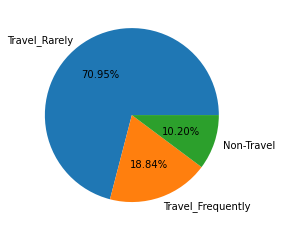

In [23]:
plt.pie(df['BusinessTravel'].value_counts().values,labels=df['BusinessTravel'].value_counts().index,autopct='%1.2f%%')

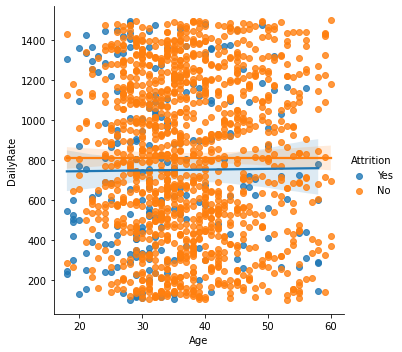

In [24]:
#DailyRate vd attrition
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

In [25]:
#Gender effect
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

In [198]:
df.groupby('Gender')['DailyRate'].mean()

Gender
Female    808.273810
Male      798.626984
Name: DailyRate, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

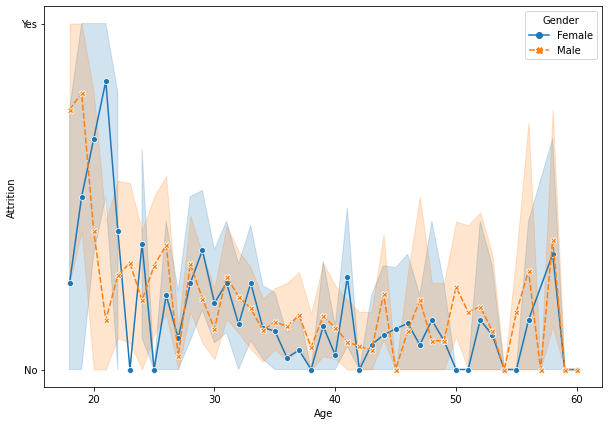

In [199]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Age',y='Attrition',hue='Gender',style='Gender',markers=True,data=df)

In [29]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [30]:
df.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

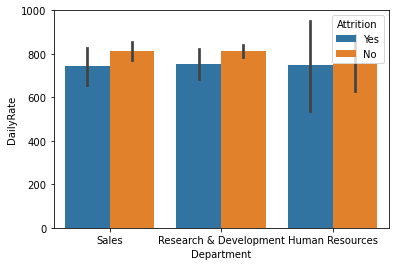

In [31]:
#Department vs Attrition
sns.barplot(x='Department',y='DailyRate',hue='Attrition', data=df)

([<matplotlib.patches.Wedge at 0x270269ce460>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.37548555701288383, -1.0339296864268501, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37%'),
  Text(0.20481030382520934, -0.5639616471419181, '30.34%'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29%')])

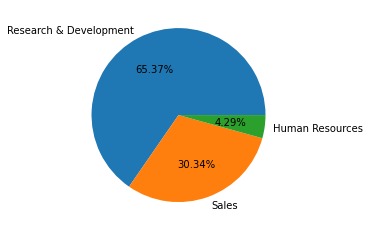

In [32]:
plt.pie(df['Department'].value_counts().values,labels=df['Department'].value_counts().index,autopct='%1.2f%%')


In [33]:
#DistanceFromHome vs Attrition
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

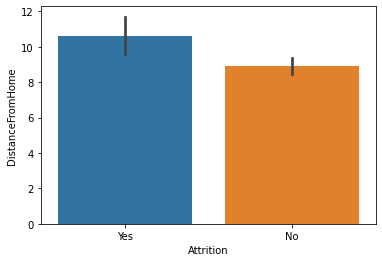

In [34]:
sns.barplot(x='Attrition',y='DistanceFromHome', data=df)

In [35]:
#Education vs Attrition
df['Education'].unique()


array([2, 1, 4, 3, 5], dtype=int64)

In [200]:
df.groupby('Education')['Attrition'].value_counts()

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

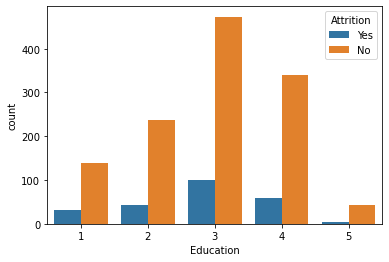

In [37]:
sns.countplot(x='Education',hue='Attrition', data=df)

In [40]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [41]:
#EducationField
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [201]:
df.groupby('Education')['EducationField'].value_counts()

Education  EducationField  
1          Life Sciences        67
           Medical              63
           Technical Degree     19
           Marketing            14
           Other                 5
           Human Resources       2
2          Life Sciences       116
           Medical              99
           Marketing            24
           Technical Degree     22
           Other                19
           Human Resources       2
3          Life Sciences       233
           Medical             183
           Marketing            59
           Technical Degree     57
           Other                24
           Human Resources      16
4          Life Sciences       173
           Medical             104
           Marketing            52
           Other                33
           Technical Degree     31
           Human Resources       5
5          Life Sciences        17
           Medical              15
           Marketing            10
           Technical Degree

<AxesSubplot:xlabel='EducationField', ylabel='count'>

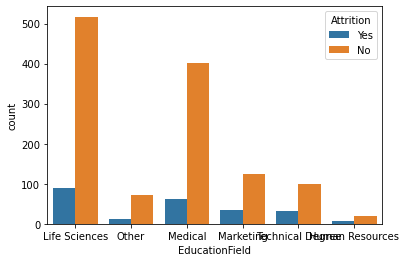

In [44]:
sns.countplot(df['EducationField'],hue='Attrition',data=df)

In [45]:
#EmployeeCount
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [46]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [47]:
#EnvironmentSatisfaction
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

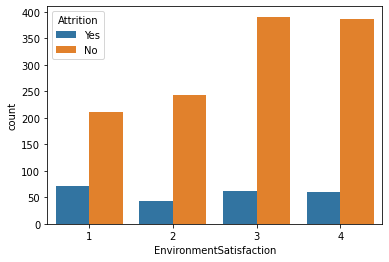

In [49]:
sns.countplot(df['EnvironmentSatisfaction'], hue='Attrition',data=df)

In [52]:
#HourlyRate
df['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

<AxesSubplot:xlabel='HourlyRate', ylabel='Attrition'>

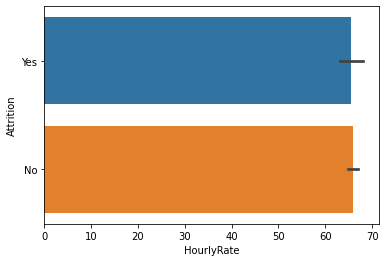

In [53]:
sns.barplot(df['HourlyRate'],df['Attrition'], data=df)

In [54]:
#JobInvolvement
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [55]:
df.groupby('JobInvolvement')['JobInvolvement'].value_counts()

JobInvolvement  JobInvolvement
1               1                  83
2               2                 375
3               3                 868
4               4                 144
Name: JobInvolvement, dtype: int64

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

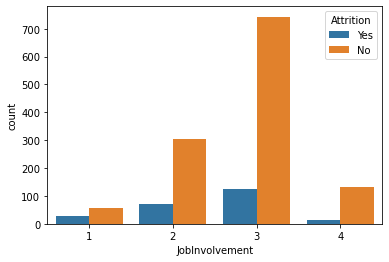

In [56]:
sns.countplot(df['JobInvolvement'],hue='Attrition',data=df)

In [57]:
#JobLevel
# ordinal categorical column
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

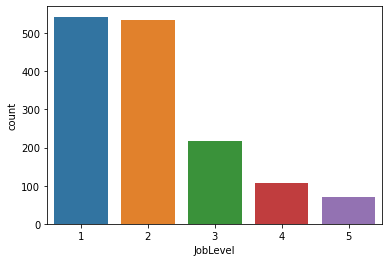

In [58]:
sns.countplot(df['JobLevel'])

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

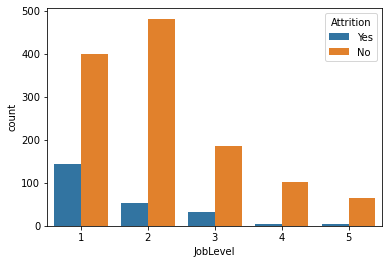

In [59]:
sns.countplot(df['JobLevel'], hue='Attrition', data=df)

In [60]:
df['JobRole'].unique()


array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [61]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

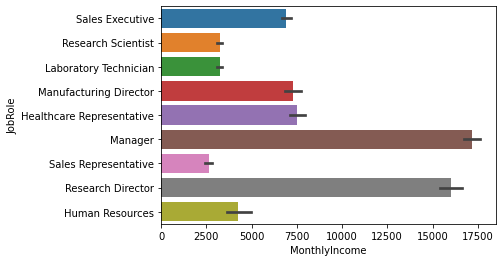

In [62]:
sns.barplot('MonthlyIncome','JobRole',data=df)

In [63]:
#JobSatisfaction
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [64]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

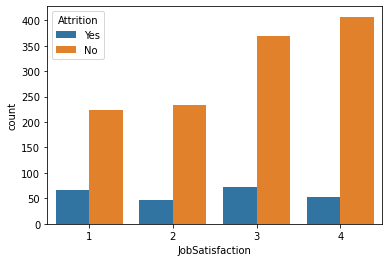

In [65]:
sns.countplot(df['JobSatisfaction'],hue='Attrition', data=df)

In [66]:
#MaritalStatus
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

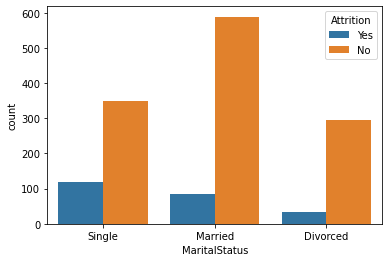

In [67]:
sns.countplot(df['MaritalStatus'], hue='Attrition',data=df)

In [68]:
#MonthlyIncome
df['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

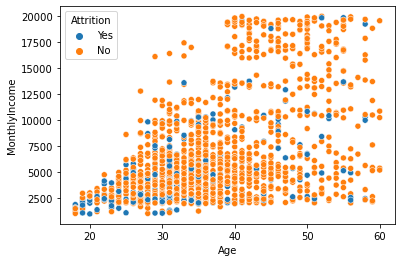

In [69]:
sns.scatterplot(x='Age', y='MonthlyIncome',hue='Attrition', data=df)

In [70]:
df['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

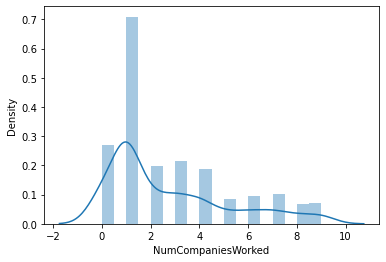

In [71]:
sns.distplot(df['NumCompaniesWorked'])

In [72]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [74]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [75]:
#PercentSalaryHike
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

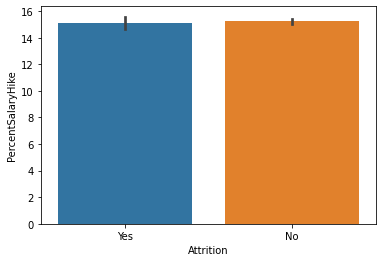

In [78]:
sns.barplot(data = df, x='Attrition', y='PercentSalaryHike')

In [79]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [80]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

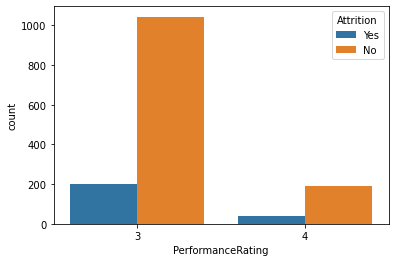

In [81]:
sns.countplot(df['PerformanceRating'],hue='Attrition', data=df)

In [85]:
df['RelationshipSatisfaction'].unique()


array([1, 4, 2, 3], dtype=int64)

In [202]:
df.groupby('RelationshipSatisfaction')['Attrition'].value_counts()

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64

In [84]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [88]:
df['StandardHours'].nunique()

1

In [89]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [91]:
df['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [92]:
df['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [93]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [203]:
df.groupby('WorkLifeBalance')['Attrition'].value_counts()

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64

In [95]:
df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

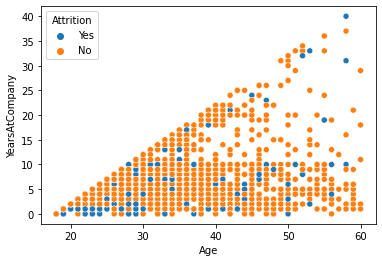

In [96]:
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=df)

In [97]:
df['Attrition'].nunique()

2

In [99]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [100]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [204]:
df['Attrition']=np.where(df['Attrition']=='Yes',1,0)

In [205]:
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [206]:
df.shape

(1470, 35)

###### observation by visual search:
    1.Resignation happens ate every age
    2.Rarely Travel person doing attrition more
    3.Attrition is  happening at lower dailyRate 
    4.as expected, More Male are leaving jobs more than Female,Male are doing more Attrition.
    5.As per count, department have not much effect on attrition.
    6.employees at early age and living far away from office are doing attrition, As the Age increases, Attrition decreases.
    7.Less EnvironmentalSatifaction, more Attrition.
    8.hourlyrate Not normally distributed.
    9.More involvement, less change for attrition.
    10.low job level workers changes job very frequently.
    11.Managers and Research Directors are taking more salary.
    12.More peroples are satisfied.
    13.Single person do more attrition, divorce do less.
    14.As the percentage salary hike increases, job sttrition decreases.
    15.Low performace Rating peoples quits more to change job.
    16.Monthly income increases when totalworking years increases.


In [207]:
a=df.drop('Attrition', axis=1)
b=df['Attrition']

In [208]:
a.shape , b.shape

((1470, 34), (1470,))

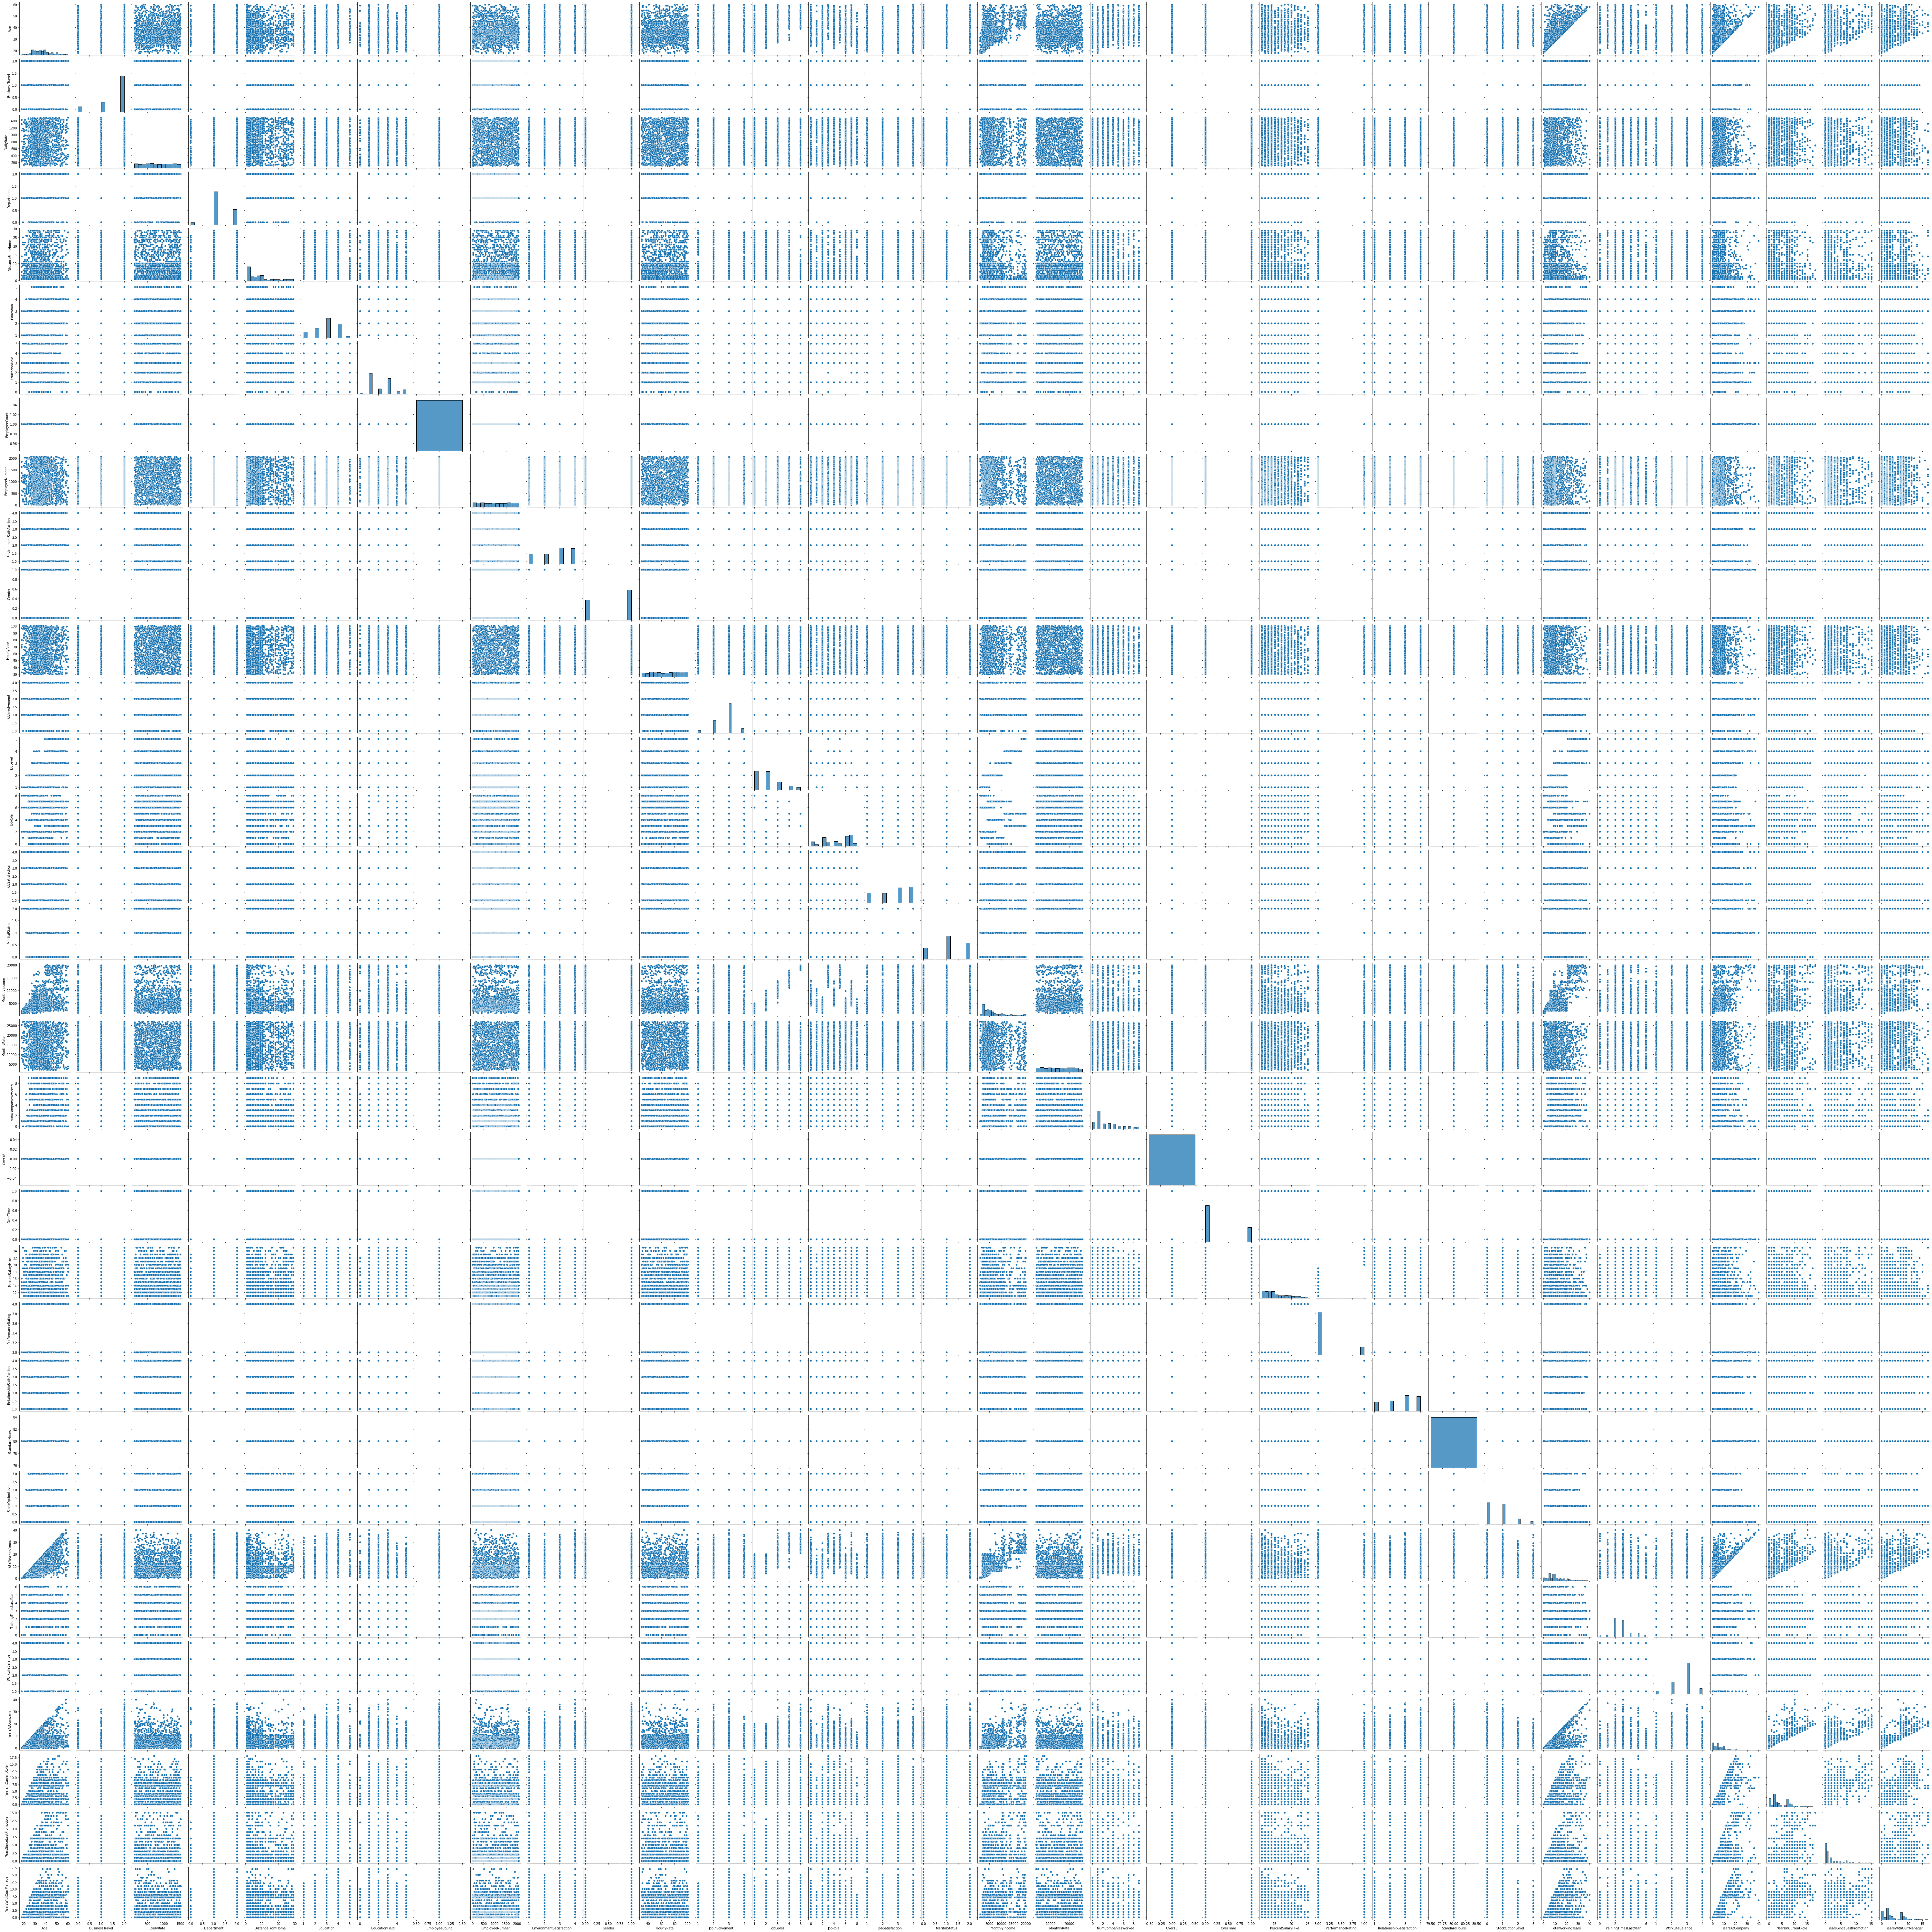

In [185]:
sns.pairplot(df)

## correlation

In [161]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

<AxesSubplot:>

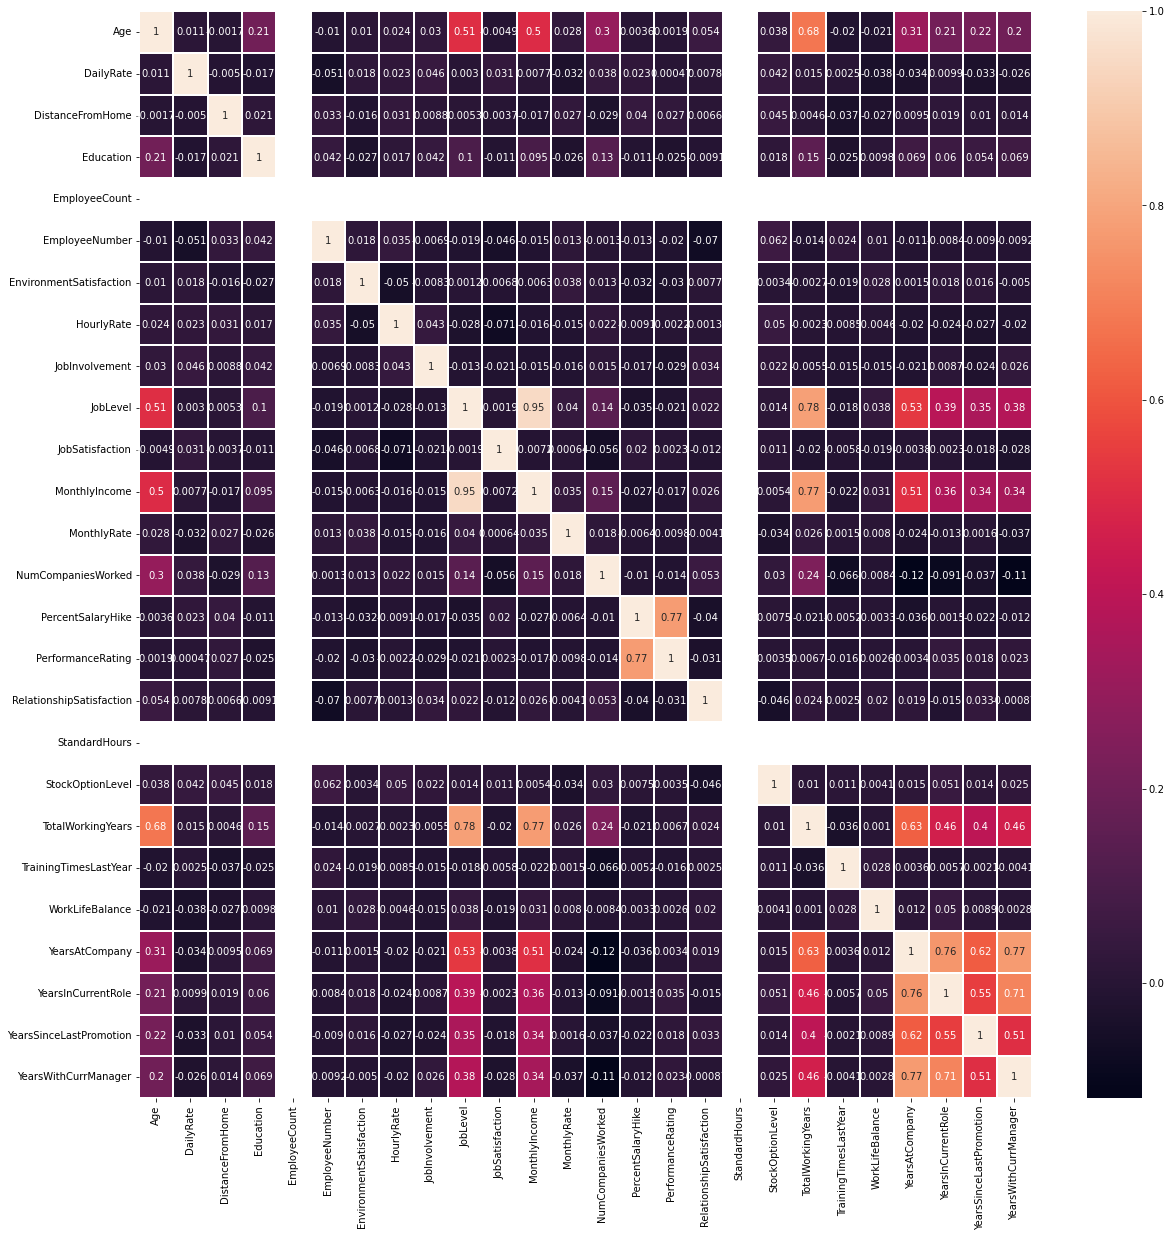

In [160]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, linecolor='white',linewidths=.25)

###### Most of the features are low correlated with target variable and soime strongly correlated
 Monthly income and Job Level are highly correlated
 Totalworkingyears are highly correlated with Joblevel
Totalworkingyears are highly corre;ated with MOnthly income
 Yearsatcompany  and Years in current role are highly correlated

In [209]:
df.select_dtypes('O')

BusinessTravel              Department EducationField  Gender  \
0         Travel_Rarely                   Sales  Life Sciences  Female   
1     Travel_Frequently  Research & Development  Life Sciences    Male   
2         Travel_Rarely  Research & Development          Other    Male   
3     Travel_Frequently  Research & Development  Life Sciences  Female   
4         Travel_Rarely  Research & Development        Medical    Male   
...                 ...                     ...            ...     ...   
1465  Travel_Frequently  Research & Development        Medical    Male   
1466      Travel_Rarely  Research & Development        Medical    Male   
1467      Travel_Rarely  Research & Development  Life Sciences    Male   
1468  Travel_Frequently                   Sales        Medical    Male   
1469      Travel_Rarely  Research & Development        Medical    Male   

                        JobRole MaritalStatus Over18 OverTime  
0               Sales Executive        Single      Y      Yes  
1            Research Scientist       Married      Y       No  
2         Laboratory Technician        Single      Y      Yes  
3            Research Scientist       Married      Y      Yes  
4         Laboratory Technician       Married      Y       No  
...                         ...           ...    ...      ...  
1465      Laboratory Technician       Married      Y       No  
1466  Healthcare Representative       Married      Y       No  
1467     Manufacturing Director       Married      Y      Yes  
1468            Sales Executive       Married      Y       No  
1469      Laboratory Technician       Married      Y       No  

[1470 rows x 8 columns]

In [210]:
df.shape

(1470, 35)

In [225]:
x= df.drop('Attrition', axis=1)
y=df['Attrition']

In [226]:
X.shape , Y.shape

((1470, 34), (1470,))

In [223]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## skewness

In [213]:
X.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [227]:
x.shape , y.shape

((1470, 34), (1470,))

## outliers

Age                            AxesSubplot(0.125,0.837584;0.133621x0.0424157)
Attrition                   AxesSubplot(0.285345,0.837584;0.133621x0.0424157)
DailyRate                    AxesSubplot(0.44569,0.837584;0.133621x0.0424157)
DistanceFromHome            AxesSubplot(0.606034,0.837584;0.133621x0.0424157)
Education                   AxesSubplot(0.766379,0.837584;0.133621x0.0424157)
EmployeeCount                  AxesSubplot(0.125,0.786685;0.133621x0.0424157)
EmployeeNumber              AxesSubplot(0.285345,0.786685;0.133621x0.0424157)
EnvironmentSatisfaction      AxesSubplot(0.44569,0.786685;0.133621x0.0424157)
HourlyRate                  AxesSubplot(0.606034,0.786685;0.133621x0.0424157)
JobInvolvement              AxesSubplot(0.766379,0.786685;0.133621x0.0424157)
JobLevel                       AxesSubplot(0.125,0.735787;0.133621x0.0424157)
JobSatisfaction             AxesSubplot(0.285345,0.735787;0.133621x0.0424157)
MonthlyIncome                AxesSubplot(0.44569,0.735787;0.1336

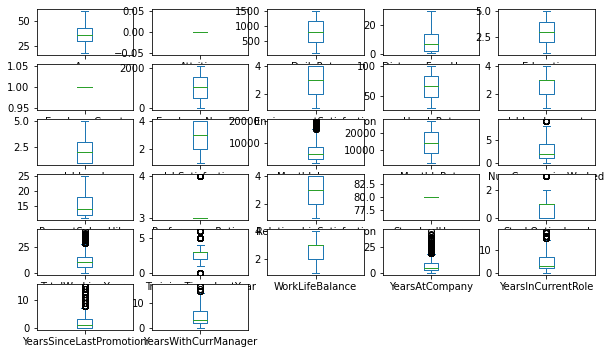

In [130]:
df.plot(kind='box', subplots=True, layout=(15,5),figsize=(10,15))

In [135]:
df['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [136]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Label Encoding

In [215]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [216]:
label_encoder = preprocessing.LabelEncoder()
df['BusinessTravel']= label_encoder.fit_transform(df['BusinessTravel'])

In [217]:
df['BusinessTravel'].unique()

array([2, 1, 0])

In [218]:
df['Department']= label_encoder.fit_transform(df['Department'])
df['EducationField']= label_encoder.fit_transform(df['EducationField'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['JobRole']= label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
df['OverTime']= label_encoder.fit_transform(df['OverTime'])
df['Over18']= label_encoder.fit_transform(df['Over18'])
df['Attrition']= label_encoder.fit_transform(df['Attrition'])


## removing outliers

In [188]:
z= np.abs(zscore(df))
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0             1.010909   0.891688        0.937414            NaN   
1             0.147150   1.868426        0.937414            NaN   
2             0.887515   0.891688        1.316673            NaN   
3             0.764121   1.061787        0.937414            NaN   
4             0.887515   1.868426        0.565311            NaN   
...                ...        ...             ...            ...   
1465          1.703764   0.891688        0.565311            NaN   
1466          0.393938   1.868426        0.565311            NaN   
1467          0.640727   0.085049        0.937414            NaN   
1468          0.887515   0.085049        0.565311            NaN   
1469          0.147150   0.085049        0.565311            NaN   

      EmployeeNumber  ...  RelationshipSatisfaction  StandardHours  \
0           1.701283  ...                  1.584178            NaN   
1           1.699621  ...                  1.191438            NaN   
2           1.696298  ...                  0.658973            NaN   
3           1.694636  ...                  0.266233            NaN   
4           1.691313  ...                  1.191438            NaN   
...              ...  ...                       ...            ...   
1465        1.721670  ...                  0.266233            NaN   
1466        1.723332  ...                  1.584178            NaN   
1467        1.726655  ...                  0.658973            NaN   
1468        1.728317  ...                  1.191438            NaN   
1469        1.733302  ...                  1.584178            NaN   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.932014           0.421642               2.171982   
1             0.241988           0.164511               0.155707   
2             0.932014           0.550208               0.155707   
3             0.932014           0.421642               0.155707   
4             0.241988           0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988           0.293077               1.707500   
1467          0.241988           0.678774               2.171982   
1468          0.932014           0.735447               0.155707   
1469          0.932014           0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            2.493820        0.164613            0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096        1.144294            1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096        0.817734            0.615492   
...               ...             ...                 ...   
1465         0.338096        0.327893            0.615492   
1466         0.338096        0.001333            0.764998   
1467         0.338096        0.164613            0.615492   
1468         1.077862        0.325228            0.488900   
1469         1.754054        0.491174           

## model building

In [228]:
# Find best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)
    
    

Best accuracy is  0.8877551020408163 on Random State = 26


### r2 score

In [229]:
ada=AdaBoostRegressor()

In [245]:
ada.fit(x_test,y_test)

AdaBoostRegressor()

In [231]:
y_pred=ada.predict(x_test)

In [232]:
y_pred.shape

(294,)

In [233]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.41591529260312765


### building different models

In [252]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,ADA_model,GB_model ]

In [253]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.6938775510204
Confusion Matrix of  LogisticRegression()  is 
 [[249   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294

**************************************************
Accuracy_Score of  RidgeClassifier() is 86.39455782312925
Confusion Matrix of  RidgeClassifier()  is 
 [[248   1]
 [ 39   6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       249
           1       0.86      0.13      0.23        45

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.86      0.86      0.82       294

**************************************

## CrossValidation

In [254]:

from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 84.6938775510204
cross Validation accuracy score of  LogisticRegression()  is  84.14965986394559
**************************************************
Accuracy_Score of  RidgeClassifier() is 86.39455782312925
cross Validation accuracy score of  RidgeClassifier()  is  86.05442176870748
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 76.87074829931973
cross Validation accuracy score of  DecisionTreeClassifier()  is  78.02721088435375
**************************************************
Accuracy_Score of  SVC() is 84.6938775510204
cross Validation accuracy score of  SVC()  is  83.87755102040816
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 82.31292517006803
cross Validation accuracy score of  KNeighborsClassifier()  is  82.10884353741497
**************************************************
Accuracy_Score of  AdaBoostClassifier() is 86.05442176870748
cross

In [259]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
x_train,x_test, y_train, y_test=train_test_split(x,y, random_state = 100, test_size = 0.33)

KNC = KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_


{'n_neighbors': 6}

In [261]:
GCV_pred=gridsearch.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8292181069958847

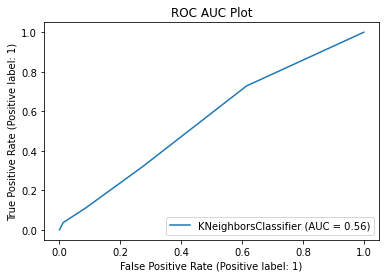

In [263]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(gridsearch.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()